In [33]:
import pandas as pd
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler

# 从 Excel 表格读取数据
data = pd.read_excel("../DataSource/result.xlsx")

# 提取特征列数据，构建特征矩阵
feature_columns = data.columns[1:]  # 选择除了第一列之外的所有列作为特征列
X = data[feature_columns].values
# 标准化数据
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 创建谱聚类对象
n_clusters = 6  # 聚类簇的数量
spectral_clustering = SpectralClustering(n_clusters=n_clusters)

# 进行谱聚类
clusters = spectral_clustering.fit_predict(X_scaled)

C:\Users\Kerberos233\AppData\Roaming\Python\Python39\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\Kerberos233\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:1151: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


In [34]:
print(clusters)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 0 0 0 4 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [35]:
from sklearn.metrics import silhouette_score
# 计算轮廓系数
silhouette_avg = silhouette_score(X_scaled, clusters)
print("Average Silhouette Score:", silhouette_avg)

Average Silhouette Score: 0.2157082549467797


In [36]:
from sklearn.metrics import pairwise_distances
from sklearn.metrics import davies_bouldin_score
import numpy as np

# 计算样本间的距离矩阵
distance_matrix = pairwise_distances(X_scaled)

# 计算类别内的最小距离
min_distances = np.min(distance_matrix[np.nonzero(distance_matrix)])

# 计算类间的最大距离
max_distances = np.max(distance_matrix)

# 计算Dunn指数
dunn_index = min_distances / max_distances

# 计算DB指数
db_index = davies_bouldin_score(X_scaled, clusters)

# 打印指数
print("Dunn Index:", dunn_index)
print("DB Index:", db_index)

Dunn Index: 0.04550434523596177
DB Index: 0.6277420489677098


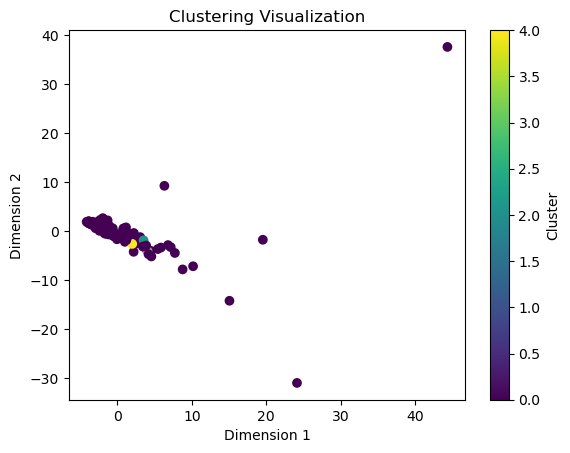

In [37]:
import matplotlib.pyplot as plt

# 使用降维方法如PCA将数据映射到二维空间
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data_2d = pca.fit_transform(X_scaled)

# 绘制散点图，颜色表示聚类结果
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=clusters)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Clustering Visualization')
plt.colorbar(label='Cluster')
plt.show()